# General Overview - Data Storytelling and Visualization

We are looking for correlations between the independent variables and the target variable, the likelihood of being readmitted to the hospital, using graphs and plots. This is also a good time to get a better understanding of patient demographics, their experiences at the hospital, medications being used / not used, and any diagnosed conditions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style='darkgrid')
%matplotlib inline

/Users/annatang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('diabetes_cleaned.csv', index_col=0) # import data
diabetes = data.copy() # save a copy of data as diabetes

In [3]:
diabetes.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,No,No,Up,No,No,No,Ch,Yes,YES
1,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,No,No,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,No,No,Up,No,No,No,Ch,Yes,NO
3,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,No,No,Steady,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[50-60),3,31,6,16,0,0,0,...,No,No,No,Steady,No,No,No,No,Yes,YES


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64360 entries, 0 to 64359
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   race                    64360 non-null  object
 1   gender                  64360 non-null  object
 2   age                     64360 non-null  object
 3   time_in_hospital        64360 non-null  int64 
 4   num_lab_procedures      64360 non-null  int64 
 5   num_procedures          64360 non-null  int64 
 6   num_medications         64360 non-null  int64 
 7   number_outpatient       64360 non-null  int64 
 8   number_emergency        64360 non-null  int64 
 9   number_inpatient        64360 non-null  int64 
 10  diag_1                  64360 non-null  object
 11  diag_2                  64360 non-null  object
 12  diag_3                  64360 non-null  object
 13  number_diagnoses        64360 non-null  int64 
 14  max_glu_serum           64360 non-null  object
 15  A1

Columns use num and number in their names, so to keep them consistent, all columns will use num.

In [5]:
diabetes = diabetes.rename(columns={'number_outpatient':'num_outpatient', 
                                    'number_emergency':'num_emergency', 
                                    'number_inpatient':'num_inpatient', 
                                    'number_diagnoses':'num_diagnoses'})

In [6]:
round(diabetes.describe(), 2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses
count,64360.00,64360.00,64360.00,64360.00,64360.00,64360.00,64360.00,64360.00
mean,4.14,42.53,1.39,15.11,0.17,0.06,0.12,7.23
std,2.77,19.84,1.72,7.20,0.54,0.23,0.39,1.97
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,2.00
25%,2.00,30.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,3.00,44.00,1.00,14.00,0.00,0.00,0.00,8.00
75%,6.00,57.00,2.00,19.00,0.00,0.00,0.00,9.00
max,13.00,103.00,6.00,40.00,3.00,1.00,2.00,13.00


In [7]:
diabetes.shape

(64360, 38)

# readmitted patients overall

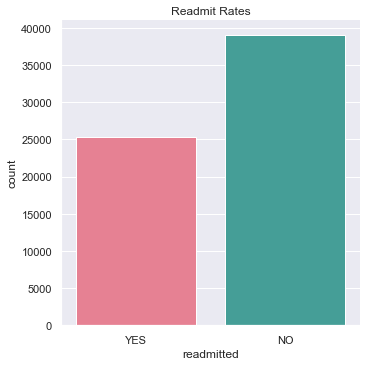

In [8]:
sns.catplot(x='readmitted', kind='count', palette='husl', data=diabetes)
plt.title('Readmit Rates')
plt.show()

In [9]:
round(diabetes.readmitted.value_counts(normalize=True), 4) * 100

NO     60.66
YES    39.34
Name: readmitted, dtype: float64

Around 61% of patients do not come back compared to 39% of patients who are readmitted.

In [10]:
# shows the numbers for each comparison and their totals
def chart_display(x, y):
    return pd.crosstab(x, y, margins=True, margins_name='Total')

# demographics

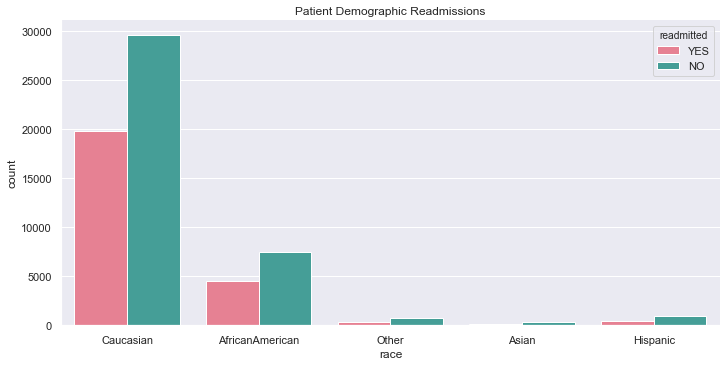

In [11]:
sns.catplot(x='race', hue='readmitted', kind='count', palette='husl', data=diabetes, aspect=2, legend_out=False)
plt.title('Patient Demographic Readmissions')
plt.show()

In [12]:
chart_display(diabetes.race, diabetes.readmitted)

readmitted,NO,YES,Total
race,,,
AfricanAmerican,7465,4557,12022
Asian,330,143,473
Caucasian,29580,19768,49348
Hispanic,923,482,1405
Other,744,368,1112
Total,39042,25318,64360


# gender

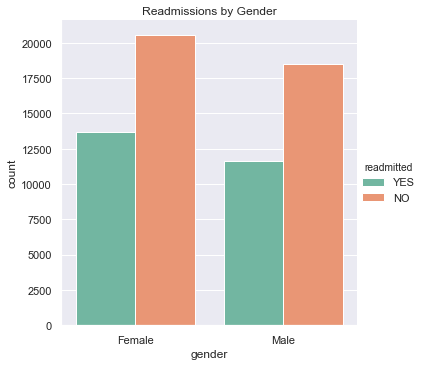

In [13]:
sns.catplot(x='gender', hue='readmitted', kind='count', palette='Set2', data=diabetes)
plt.title('Readmissions by Gender')
plt.show()

In [14]:
chart_display(diabetes.gender, diabetes.readmitted)

readmitted,NO,YES,Total
gender,,,
Female,20559,13717,34276
Male,18483,11601,30084
Total,39042,25318,64360


# age groups

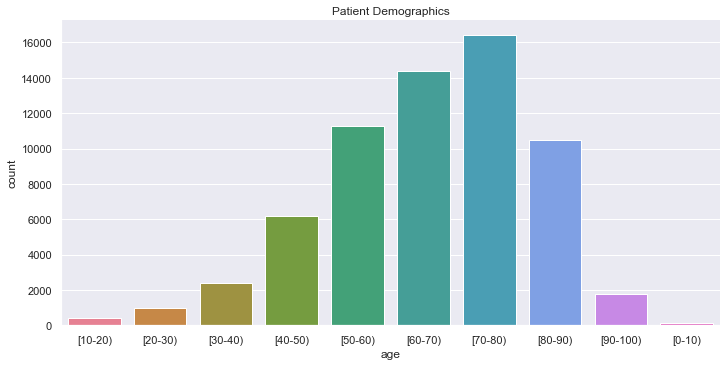

In [15]:
sns.catplot(x='age', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('Patient Demographics')
plt.show()

It looks like most patients are older, 50+ years old, though there aren't many patients over 90.

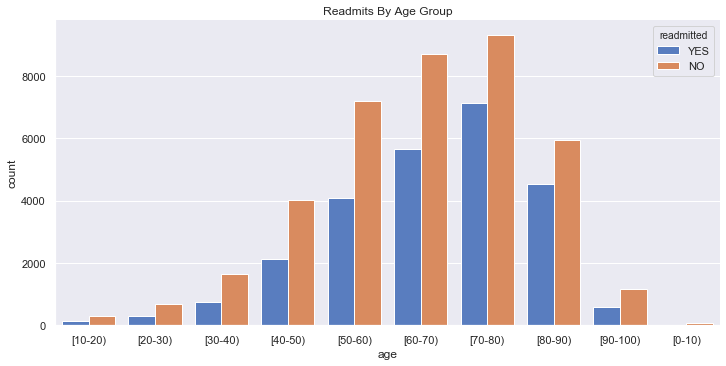

In [16]:
sns.catplot(x='age', hue='readmitted', kind='count', palette='muted', aspect=2, data=diabetes, legend_out=False)
plt.title('Readmits By Age Group')
plt.show()

In every age group, more patients are not readmitted. The 70-80 age group account has the highest number of readmitted and not readmitted patients.

# time in hospital

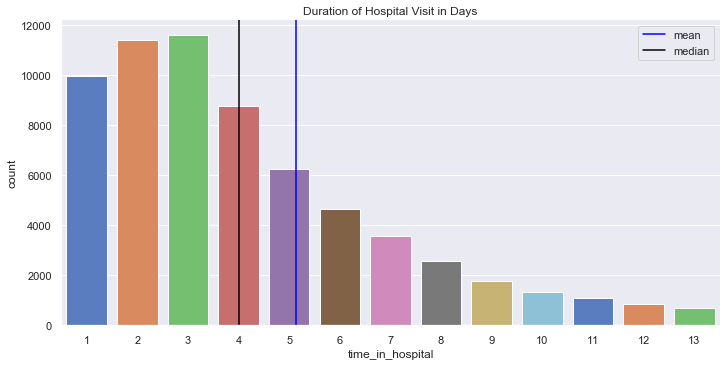

In [17]:
sns.catplot(x='time_in_hospital', kind='count', palette='muted', data=diabetes, aspect=2)
plt.axvline(np.mean(diabetes.time_in_hospital), color='blue', label='mean')
plt.axvline(np.median(diabetes.time_in_hospital), color='black', label='median')
plt.title('Duration of Hospital Visit in Days')
plt.legend()
plt.show()

In [18]:
print('Average time spent in hospital: {} days'.format(round(np.mean(diabetes.time_in_hospital), 2)))
print('Median time spent in hospital: {} days'.format(round(np.median(diabetes.time_in_hospital), 2)))

Average time spent in hospital: 4.14 days
Median time spent in hospital: 3.0 days


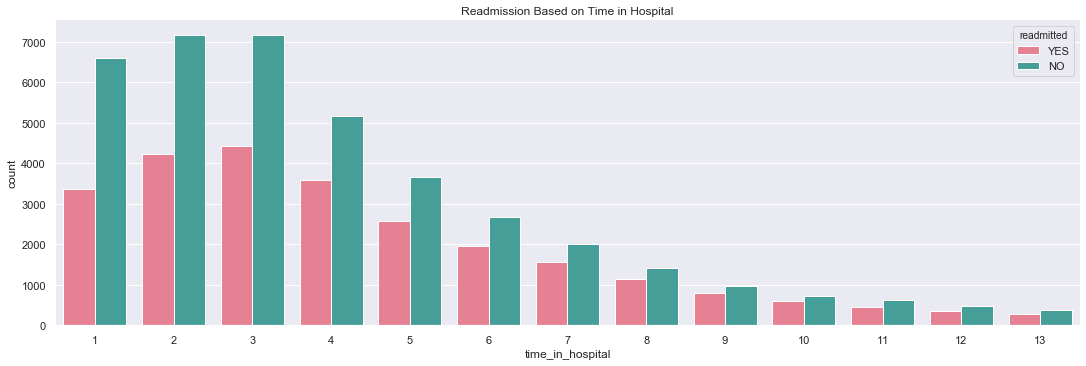

In [19]:
# does the amount of time spent in the hospital impact a patient's chances of readmission?
sns.catplot(x='time_in_hospital', hue='readmitted', kind='count', palette='husl', aspect=3, data=diabetes, legend_out=False)
plt.title('Readmission Based on Time in Hospital')
plt.show()

Based on the graph, the longer a patient spends in the hospital, the likelier their chances are of being readmitted. Patients who spend more than a week in the hospital usually have a serious illness or complication that may reoccur depending on their ability to recover, which is why they may need to revisit the hospital.

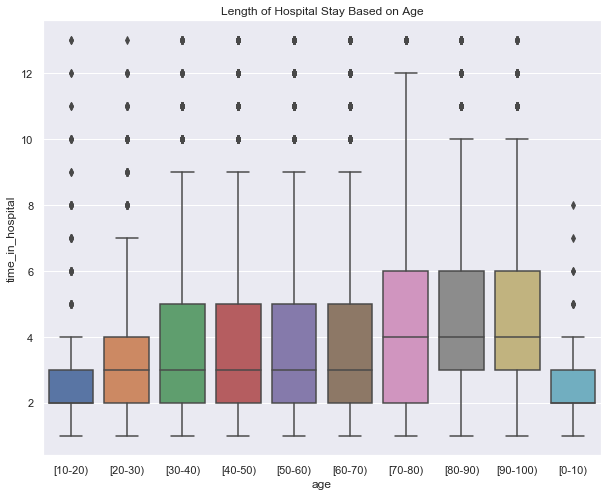

In [20]:
# who is spending the most time in hospitals during visits?
plt.figure(figsize=(10, 8))
sns.boxplot(x='age', y='time_in_hospital', data=diabetes)
plt.title('Length of Hospital Stay Based on Age')
plt.show()

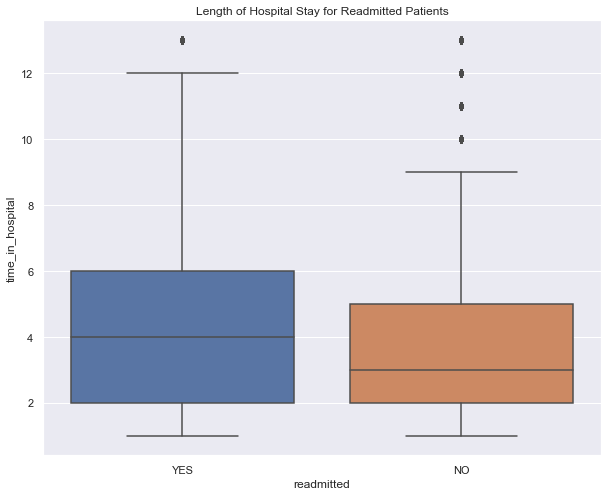

In [21]:
# comparison of time in hospital for readmitted patients
plt.figure(figsize=(10, 8))
sns.boxplot(x='readmitted', y='time_in_hospital', data=diabetes)
plt.title('Length of Hospital Stay for Readmitted Patients')
plt.show()

Readmitted patients stay longer in the hospital on average compared to those who are not readmitted.

# number of lab procedures

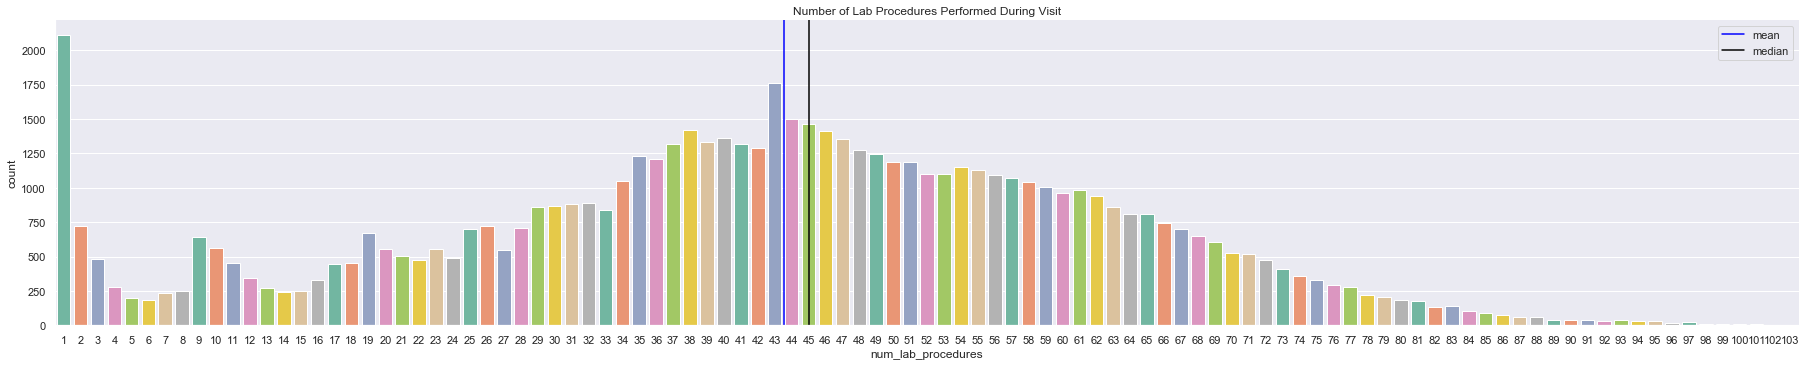

In [22]:
sns.catplot(x='num_lab_procedures', kind='count', palette='Set2', data=diabetes, aspect=5)
plt.axvline(np.mean(diabetes.num_lab_procedures), color='blue', label='mean')
plt.axvline(np.median(diabetes.num_lab_procedures), color='black', label='median')
plt.title('Number of Lab Procedures Performed During Visit')
plt.legend()
plt.show()

In [23]:
print('Lab Tests Performed During Visit')
print('Average: {} procedures'.format(round(np.mean(diabetes.num_lab_procedures), 2)))
print('Median: {} procedures'.format(round(np.median(diabetes.num_lab_procedures), 2)))

Lab Tests Performed During Visit
Average: 42.53 procedures
Median: 44.0 procedures


In [24]:
diabetes.groupby('readmitted')['num_lab_procedures'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39042.0,41.862558,19.847463,1.0,30.0,43.0,56.0,103.0
YES,25318.0,43.554546,19.779953,1.0,32.0,45.0,58.0,103.0


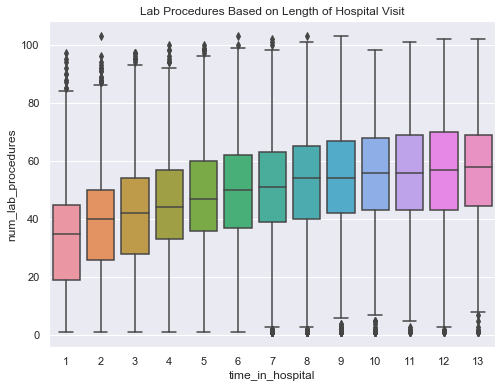

In [25]:
# do patients with longer hospital stays have more lab tests?
plt.figure(figsize=(8, 6))
sns.boxplot(x='time_in_hospital', y='num_lab_procedures', data=diabetes)
plt.title('Lab Procedures Based on Length of Hospital Visit')
plt.show()

There is a positive correlation between time spent in the hospital and number of lab tests completed. This makes sense since patients with longer stays had more tests completed to properly diagnose their conditions.

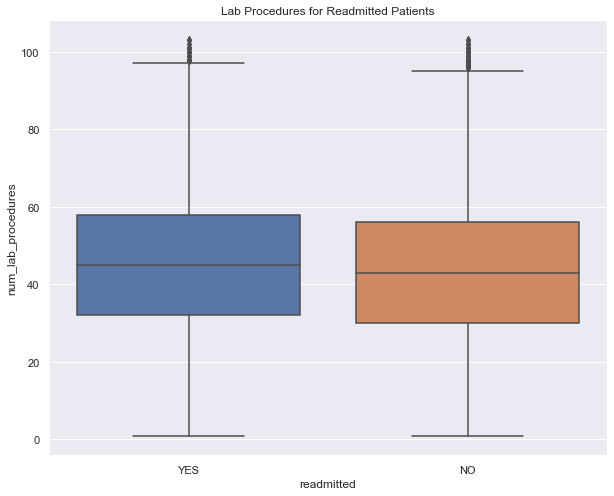

In [26]:
# do readmitted patients have more lab tests?
plt.figure(figsize=(10, 8))
sns.boxplot(x='readmitted', y='num_lab_procedures', data=diabetes)
plt.title('Lab Procedures for Readmitted Patients')
plt.show()

The average number of lab procedures is about equal for readmitted and not readmitted patients. Not readmitted patients have a slightly lower number of lab procedures done during their visit.

# number of procedures (other than lab)

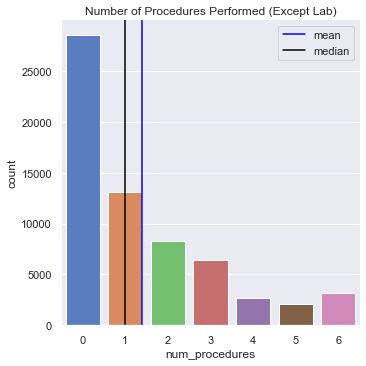

In [27]:
sns.catplot(x='num_procedures', kind='count', palette='muted', data=diabetes)
plt.axvline(np.mean(diabetes.num_procedures), color='blue', label='mean')
plt.axvline(np.median(diabetes.num_procedures), color='black', label='median')
plt.title('Number of Procedures Performed (Except Lab)')
plt.legend()
plt.show()

In [28]:
print('Procedures Performed During Visit Besides Lab:')
print('Average: {} procedures'.format(round(np.mean(diabetes.num_procedures), 2)))
print('Median: {} procedures'.format(round(np.median(diabetes.num_procedures), 2)))

Procedures Performed During Visit Besides Lab:
Average: 1.39 procedures
Median: 1.0 procedures


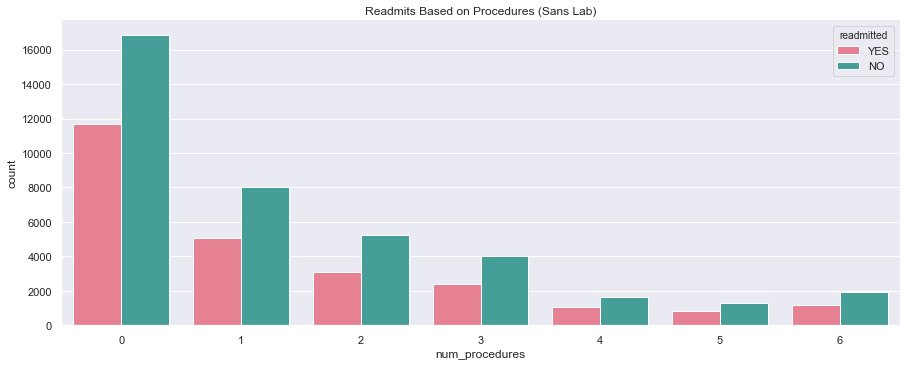

In [29]:
# do the number of tests performed indicate whether a patient will be readmitted?
sns.catplot(x='num_procedures', hue='readmitted', kind='count', palette='husl', aspect=2.5, data=diabetes, legend_out=False)
plt.title('Readmits Based on Procedures (Sans Lab)')
plt.show()

# number of medications

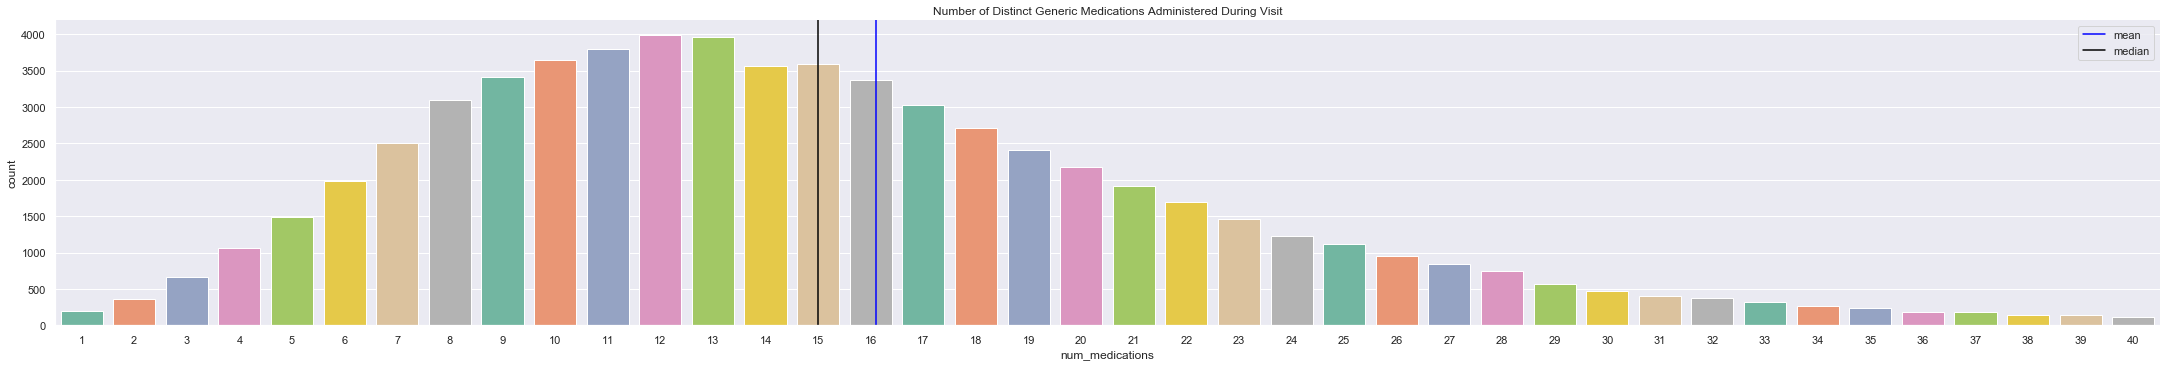

In [30]:
sns.catplot(x='num_medications', kind='count', palette='Set2', data=diabetes, aspect=6)
plt.axvline(np.mean(diabetes.num_medications), color='blue', label='mean')
plt.axvline(np.median(diabetes.num_medications), color='black', label='median')
plt.title('Number of Distinct Generic Medications Administered During Visit')
plt.legend()
plt.show()

In [31]:
print('Distinct Generic Medications Administered During Visit:')
print('Average: {} medications'.format(round(np.mean(diabetes.num_medications), 2)))
print('Median: {} medications'.format(round(np.median(diabetes.num_medications), 2)))

Distinct Generic Medications Administered During Visit:
Average: 15.11 medications
Median: 14.0 medications


In [32]:
diabetes.groupby('readmitted')['num_medications'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39042.0,14.829773,7.302052,1.0,9.0,14.0,19.0,40.0
YES,25318.0,15.540801,7.022513,1.0,10.0,15.0,20.0,40.0


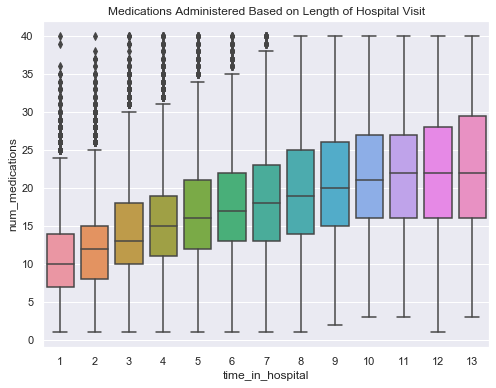

In [33]:
# how many medications are patients receiving during their visit?
plt.figure(figsize=(8, 6))
sns.boxplot(x='time_in_hospital', y='num_medications', data=diabetes)
plt.title('Medications Administered Based on Length of Hospital Visit')
plt.show()

Patients who spend more time in the hospital receive more medications, but there are a few that receive over 60 different kinds of medications.

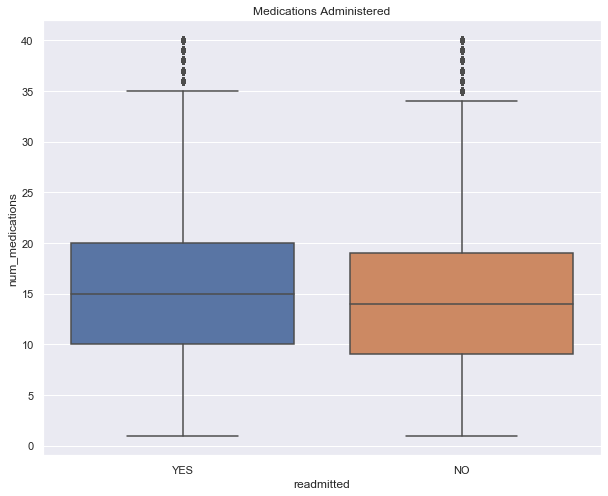

In [34]:
# how many medications are patients receiving during their visit?
plt.figure(figsize=(10, 8))
sns.boxplot(x='readmitted', y='num_medications', data=diabetes)
plt.title('Medications Administered')
plt.show()

The distribution is almost equal for readmitted and not readmitted patients, with readmits being slightly higher on average.

# number of outpatient visits

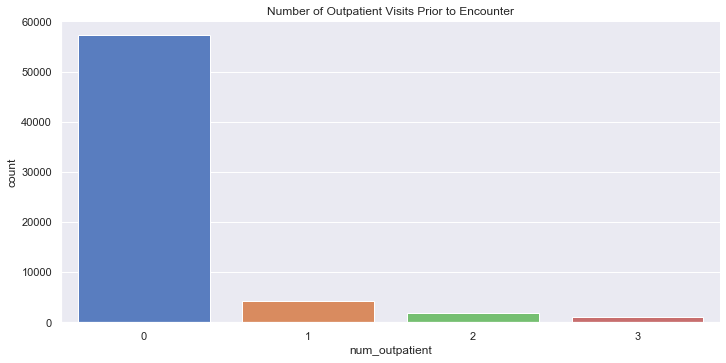

In [35]:
sns.catplot(x='num_outpatient', kind='count', palette='muted', data=diabetes, aspect=2)
plt.title('Number of Outpatient Visits Prior to Encounter')
plt.show()

In [36]:
# outpatient visit stats
diabetes.groupby('readmitted')['num_outpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39042.0,0.143077,0.499039,0.0,0.0,0.0,0.0,3.0
YES,25318.0,0.211589,0.593094,0.0,0.0,0.0,0.0,3.0


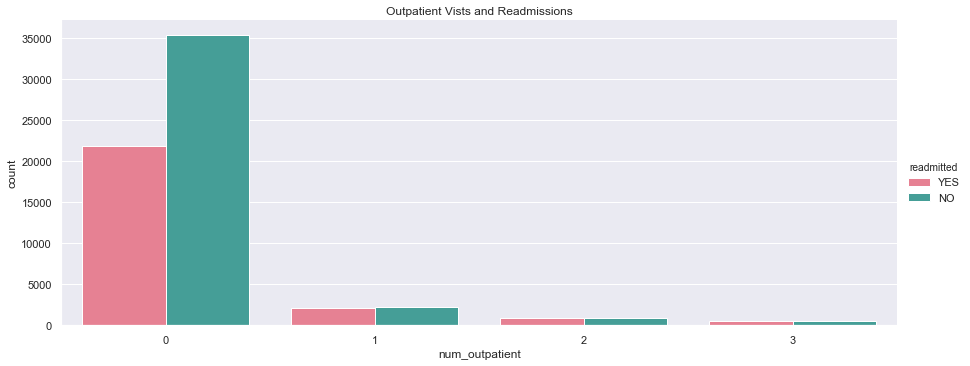

In [37]:
# outpatient vists and readmissions
sns.catplot(x='num_outpatient', hue='readmitted', kind='count', palette='husl', aspect=2.5, data=diabetes)
plt.title('Outpatient Vists and Readmissions')
plt.show()

In [38]:
chart_display(diabetes.readmitted, diabetes.num_outpatient)

num_outpatient,0,1,2,3,Total
readmitted,,,,,
NO,35401,2219,899,523,39042
YES,21828,2097,919,474,25318
Total,57229,4316,1818,997,64360


Most patients did not have any outpatient visits prior to the recorded one.

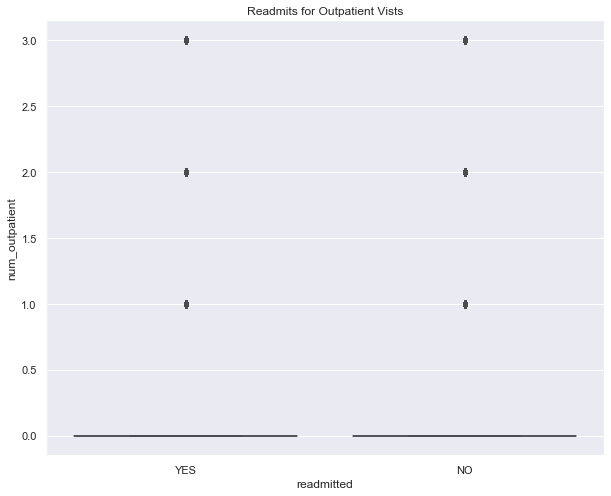

In [39]:
# how many outpatient visits did patients have prior to this visit?
plt.figure(figsize=(10, 8))
sns.boxplot(x='readmitted', y='num_outpatient', data=diabetes)
plt.title('Readmits for Outpatient Vists')
plt.show() # identical plot

# number of emergency visits

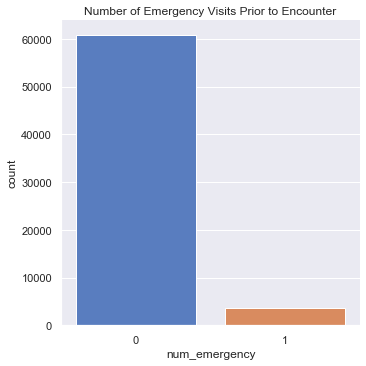

In [40]:
sns.catplot(x='num_emergency', kind='count', palette='muted', data=diabetes)
plt.title('Number of Emergency Visits Prior to Encounter')
plt.show()

In [41]:
diabetes.groupby('readmitted')['num_emergency'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39042.0,0.043978,0.205049,0.0,0.0,0.0,0.0,1.0
YES,25318.0,0.072676,0.259608,0.0,0.0,0.0,0.0,1.0


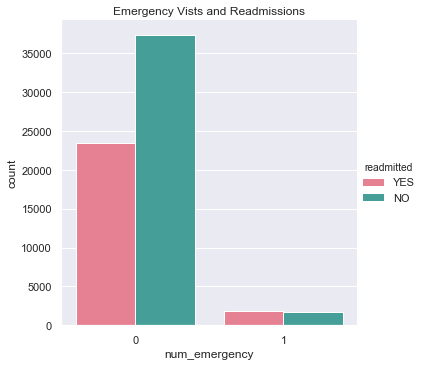

In [42]:
# emergency vists and readmissions
sns.catplot(x='num_emergency', hue='readmitted', kind='count', palette='husl', data=diabetes)
plt.title('Emergency Vists and Readmissions')
plt.show()

Most patients did not visit the emergency room prior to their recorded visit.

In [43]:
chart_display(diabetes.readmitted, diabetes.num_emergency)

num_emergency,0,1,Total
readmitted,,,
NO,37325,1717,39042
YES,23478,1840,25318
Total,60803,3557,64360


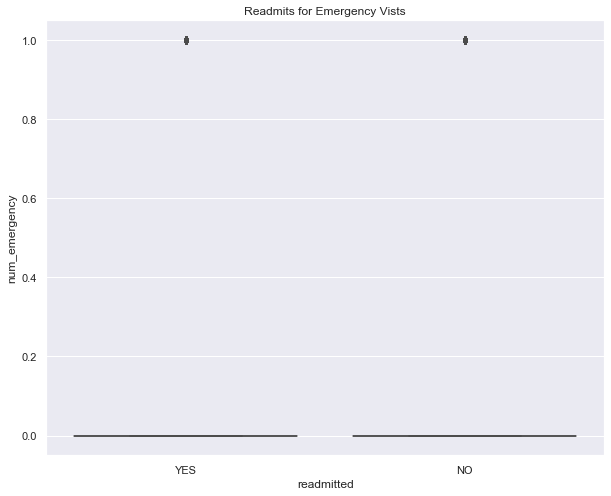

In [44]:
# how many emergency visits did patients have prior to this visit?
plt.figure(figsize=(10, 8))
sns.boxplot(x='readmitted', y='num_emergency', data=diabetes)
plt.title('Readmits for Emergency Vists')
plt.show() # identical plot

# number of inpatient visits

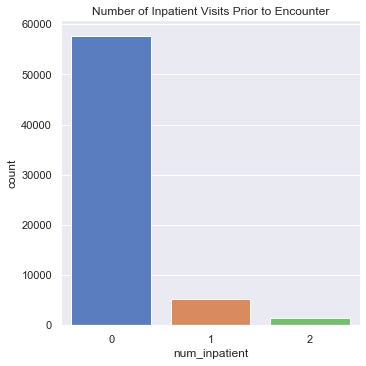

In [45]:
sns.catplot(x='num_inpatient', kind='count', palette='muted', data=diabetes)
plt.title('Number of Inpatient Visits Prior to Encounter')
plt.show()

In [46]:
diabetes.groupby('readmitted')['num_inpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39042.0,0.086932,0.322915,0.0,0.0,0.0,0.0,2.0
YES,25318.0,0.180583,0.465179,0.0,0.0,0.0,0.0,2.0


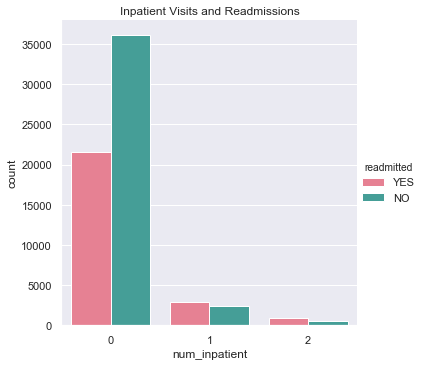

In [47]:
# inpatient visits and readmissions
sns.catplot(x='num_inpatient', hue='readmitted', kind='count', palette='husl', data=diabetes)
plt.title('Inpatient Visits and Readmissions')
plt.show()

Inpatient visits are not common for most patients prior to this visit.

In [48]:
chart_display(diabetes.readmitted, diabetes.num_inpatient)

num_inpatient,0,1,2,Total
readmitted,,,,
NO,36134,2422,486,39042
YES,21612,2840,866,25318
Total,57746,5262,1352,64360


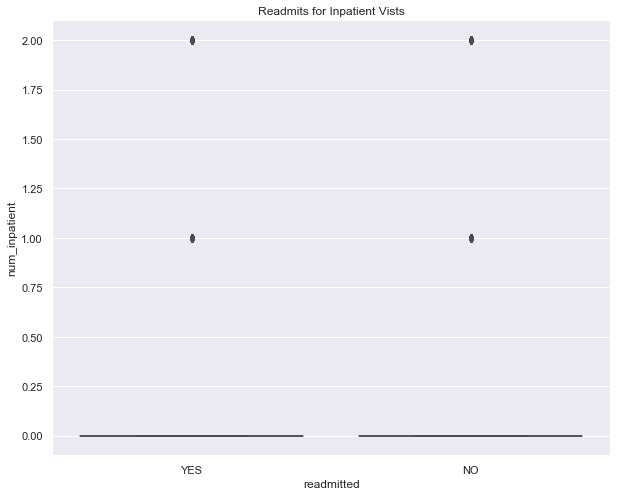

In [49]:
# how many inpatient visits did patients have prior to this visit?
plt.figure(figsize=(10, 8))
sns.boxplot(x='readmitted', y='num_inpatient', data=diabetes)
plt.title('Readmits for Inpatient Vists')
plt.show() # identical plot

# number of diagnoses

We are only using the primary diagnosis variable to build the machine learning model since the most common diagnoses are prevalent in all three diagnoses listed.

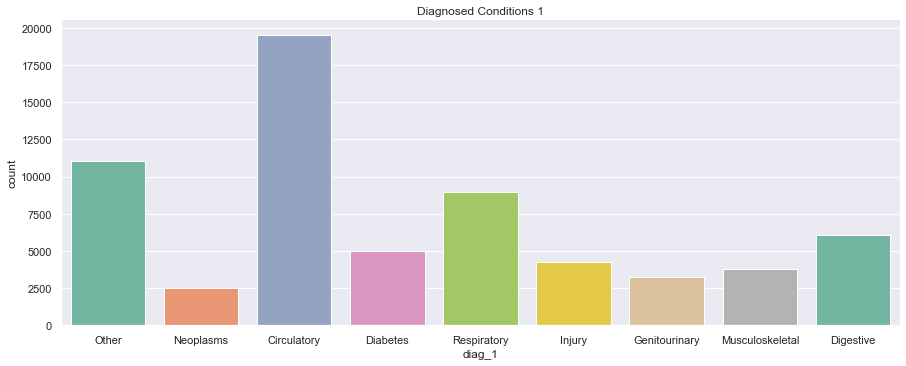

In [50]:
sns.catplot(x='diag_1', kind='count', palette='Set2', data=diabetes, aspect=2.5)
plt.title('Diagnosed Conditions 1')
plt.show()

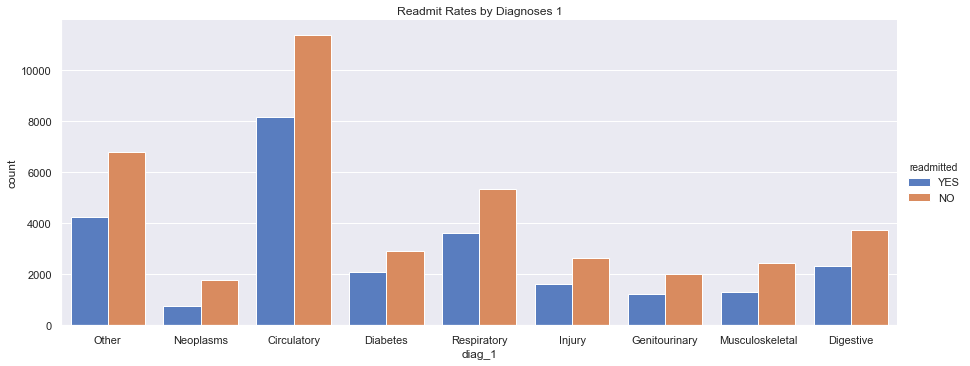

In [51]:
sns.catplot(x='diag_1', hue='readmitted', kind='count', palette='muted', aspect=2.5, data=diabetes)
plt.title('Readmit Rates by Diagnoses 1')
plt.show()

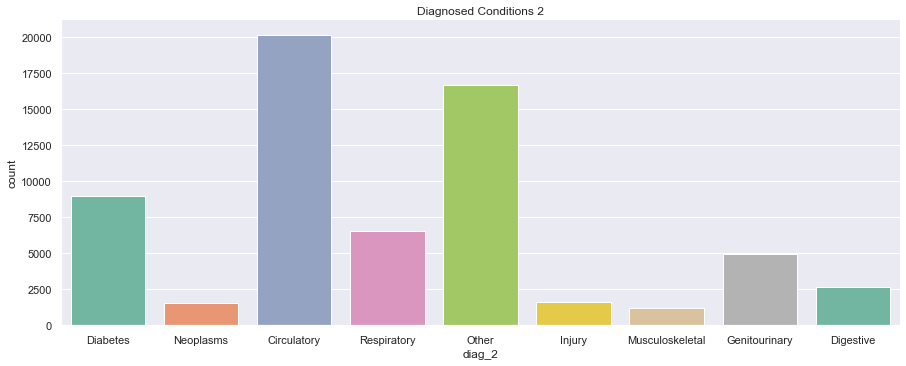

In [52]:
sns.catplot(x='diag_2', kind='count', palette='Set2', data=diabetes, aspect=2.5)
plt.title('Diagnosed Conditions 2')
plt.show()

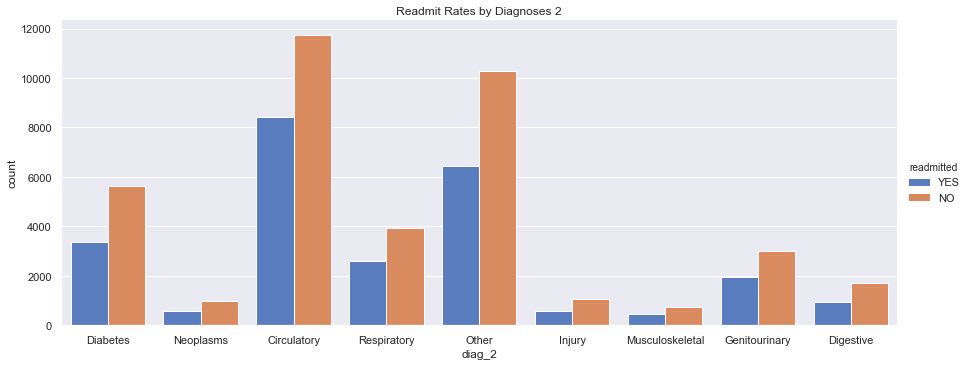

In [53]:
sns.catplot(x='diag_2', hue='readmitted', kind='count', palette='muted', aspect=2.5, data=diabetes)
plt.title('Readmit Rates by Diagnoses 2')
plt.show()

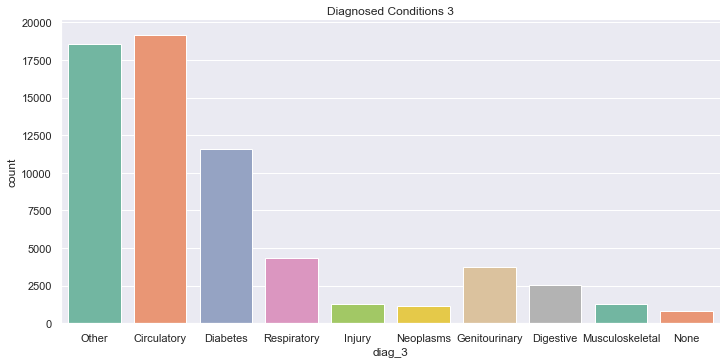

In [54]:
sns.catplot(x='diag_3', kind='count', palette='Set2', data=diabetes, aspect=2)
plt.title('Diagnosed Conditions 3')
plt.show()

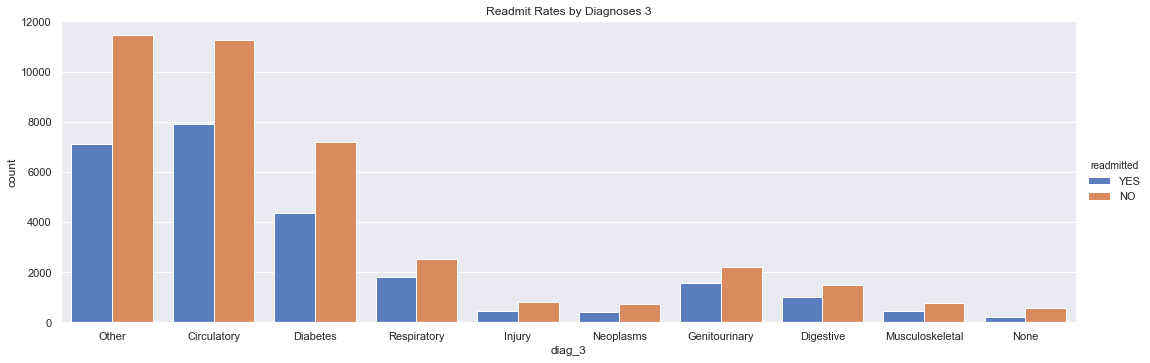

In [55]:
sns.catplot(x='diag_3', hue='readmitted', kind='count', palette='muted', aspect=3, data=diabetes)
plt.title('Readmit Rates by Diagnoses 3')
plt.show()

In [56]:
# drop diagnoses 2 and 3
diabetes = diabetes.drop(columns=['diag_2', 'diag_3'])

# number of diagnosed conditions

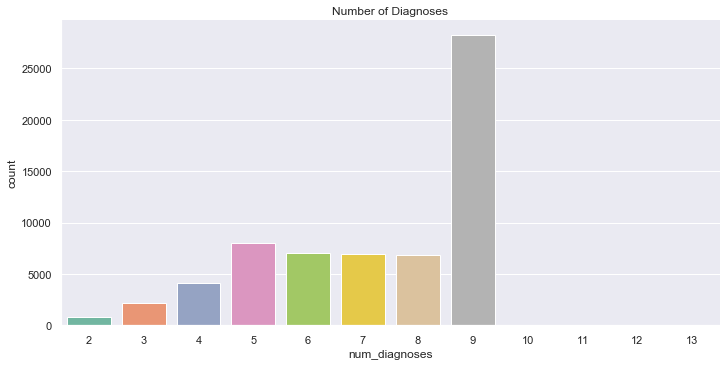

In [57]:
sns.catplot(x='num_diagnoses', kind='count', palette='Set2', data=diabetes, aspect=2)
plt.title('Number of Diagnoses')
plt.show()

In [58]:
print('Number of Diagnoses:')
print('Average: {} diagnoses'.format(round(np.mean(diabetes.num_diagnoses), 2)))
print('Median: {} diagnoses'.format(round(np.median(diabetes.num_diagnoses), 2)))

Number of Diagnoses:
Average: 7.23 diagnoses
Median: 8.0 diagnoses


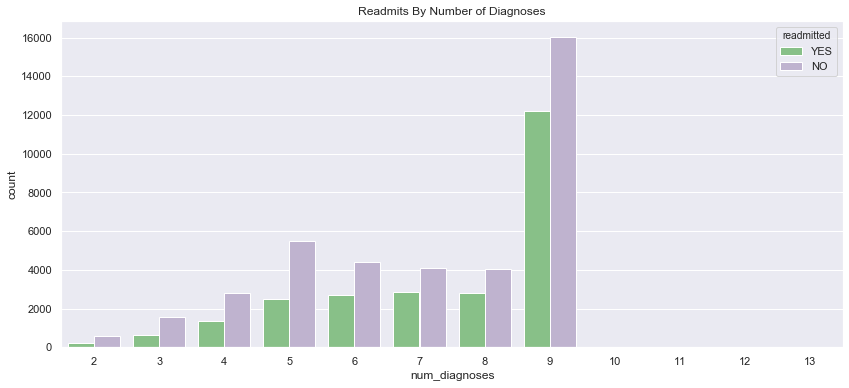

In [59]:
# number of diagnoses and readmit rate
plt.figure(figsize=(14, 6))
sns.countplot(x='num_diagnoses', hue='readmitted', palette='Accent', data=diabetes)
plt.title('Readmits By Number of Diagnoses')
plt.show()

In [60]:
diabetes.num_diagnoses.describe()

count    64360.000000
mean         7.233903
std          1.968280
min          2.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         13.000000
Name: num_diagnoses, dtype: float64

In [61]:
diabetes.groupby('readmitted')['num_diagnoses'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39042.0,7.082552,2.022725,2.0,5.0,8.0,9.0,13.0
YES,25318.0,7.467296,1.857256,2.0,6.0,8.0,9.0,13.0


In [62]:
# number of diagnoses
chart_display(diabetes.readmitted, diabetes.num_diagnoses)

num_diagnoses,2,3,4,5,6,7,8,9,10,11,12,13,Total
readmitted,,,,,,,,,,,,,
NO,588,1567,2816,5466,4399,4106,4035,16048,5,2,4,6,39042
YES,228,650,1347,2505,2686,2848,2828,12215,2,4,2,3,25318
Total,816,2217,4163,7971,7085,6954,6863,28263,7,6,6,9,64360


Most patients have up to nine diagnosed conditions during their visit, after that, only a handful have more than nine in one visit. Readmitted patients tend to have more diagnosed conditions but their average is only slightly higher than those not readmitted.

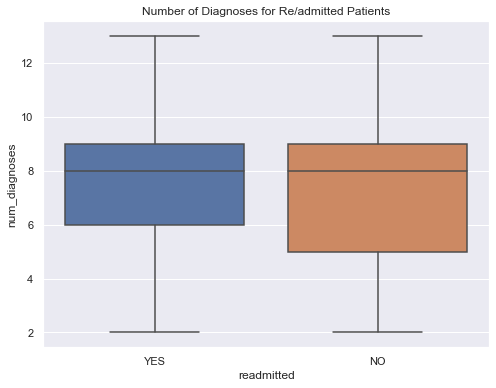

In [63]:
# how many diagnoses do readmitted patients have?
plt.figure(figsize=(8, 6))
sns.boxplot(x='readmitted', y='num_diagnoses', data=diabetes)
plt.title('Number of Diagnoses for Re/admitted Patients')
plt.show()

# glucose serum test results

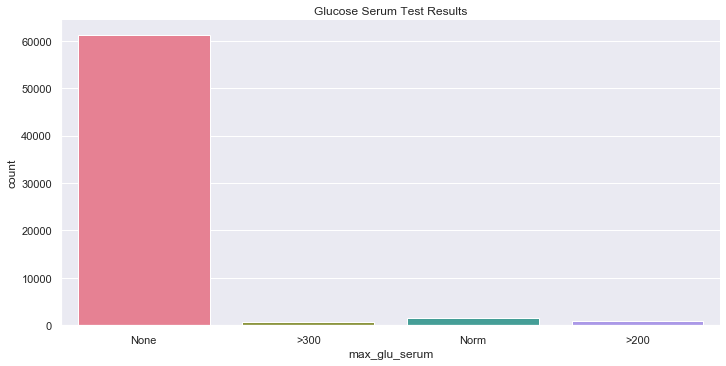

In [64]:
sns.catplot(x='max_glu_serum', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('Glucose Serum Test Results')
plt.show()

Since the majority of patients do not have a glucose reading, they will be excluded for the next graph in order to show the readmit rates for patients who do have a reading.

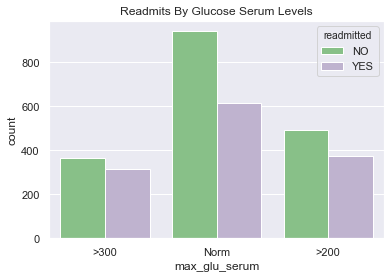

In [65]:
# exclude patients without a glucose reading
glucose_none = diabetes[diabetes.max_glu_serum != 'None']

# glucose serum results and readmit impact
sns.countplot(x='max_glu_serum', hue='readmitted', palette='Accent', data=glucose_none)
plt.title('Readmits By Glucose Serum Levels')
plt.show()

Patients with a glucose serum reading of over 300 have a 50-50 chance of being readmitted. High blood sugar levels are often dangerous for older patients due to the medical complications involved, so it's understandable that more patients return to the hospital for additional care.

In [66]:
chart_display(diabetes.readmitted, diabetes.max_glu_serum)

max_glu_serum,>200,>300,None,Norm,Total
readmitted,,,,,
NO,492,367,37242,941,39042
YES,372,314,24019,613,25318
Total,864,681,61261,1554,64360


# HbA1C results

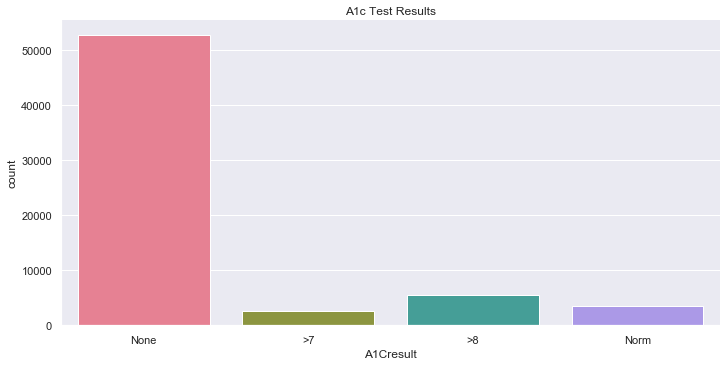

In [67]:
sns.catplot(x='A1Cresult', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('A1c Test Results')
plt.show()

Similar to the glucose reading, the majority of patients also do not have a HbA1c test reading. In order to understand the impact of HbA1c tests on readmit rates, patients without a reading will be excluded in the graph below.

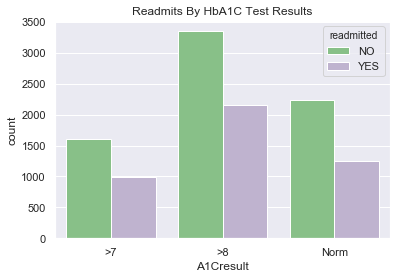

In [68]:
# exclude patients without an A1C reading
alc_none = diabetes[diabetes.A1Cresult != 'None']

# A1C results and readmit impact
sns.countplot(x='A1Cresult', hue='readmitted', palette='Accent', data=alc_none)
plt.title('Readmits By HbA1C Test Results')
plt.show()

In [69]:
chart_display(diabetes.readmitted, diabetes.A1Cresult)

A1Cresult,>7,>8,None,Norm,Total
readmitted,,,,,
NO,1610,3349,31842,2241,39042
YES,996,2151,20925,1246,25318
Total,2606,5500,52767,3487,64360


# medications

Let's take a look at changes in medications and diabetes medications.

## change in medications, dosage or brand

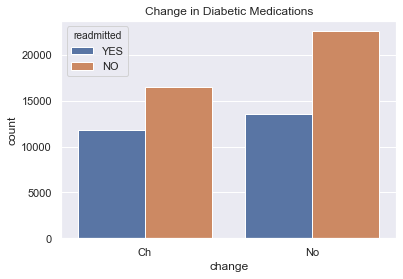

In [70]:
# change in medications
sns.countplot(x='change', hue='readmitted', data=diabetes)
plt.title('Change in Diabetic Medications')
plt.show()

In [71]:
chart_display(diabetes.change, diabetes.readmitted)

readmitted,NO,YES,Total
change,,,
Ch,16462,11773,28235
No,22580,13545,36125
Total,39042,25318,64360


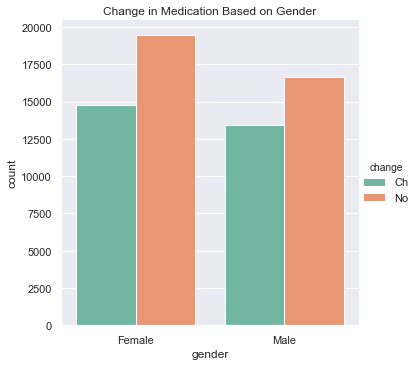

In [72]:
# who is likely to have a change in medication?
sns.catplot(x='gender', hue='change', kind='count', palette='Set2', data=diabetes)
plt.title('Change in Medication Based on Gender')
plt.show()

In [73]:
chart_display(diabetes.gender, diabetes.change)

change,Ch,No,Total
gender,,,
Female,14802,19474,34276
Male,13433,16651,30084
Total,28235,36125,64360


## diabetic medications prescribed

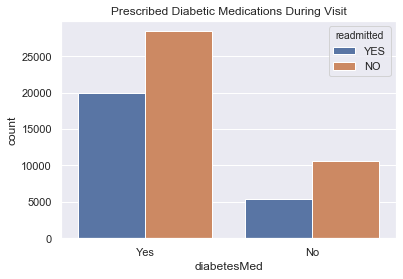

In [74]:
sns.countplot(x='diabetesMed', hue='readmitted', data=diabetes)
plt.title('Prescribed Diabetic Medications During Visit')
plt.show()

In [75]:
chart_display(diabetes.diabetesMed, diabetes.readmitted)

readmitted,NO,YES,Total
diabetesMed,,,
No,10597,5363,15960
Yes,28445,19955,48400
Total,39042,25318,64360


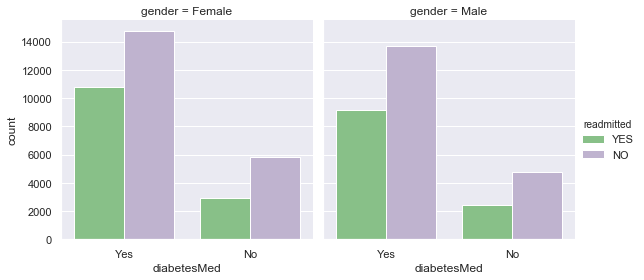

In [76]:
# who is likely or not likely to have a change in medication?
sns.catplot(x='diabetesMed', hue='readmitted', col='gender', palette='Accent', data=diabetes, kind='count', height=4, aspect=1)
plt.show()

## medications used by patients

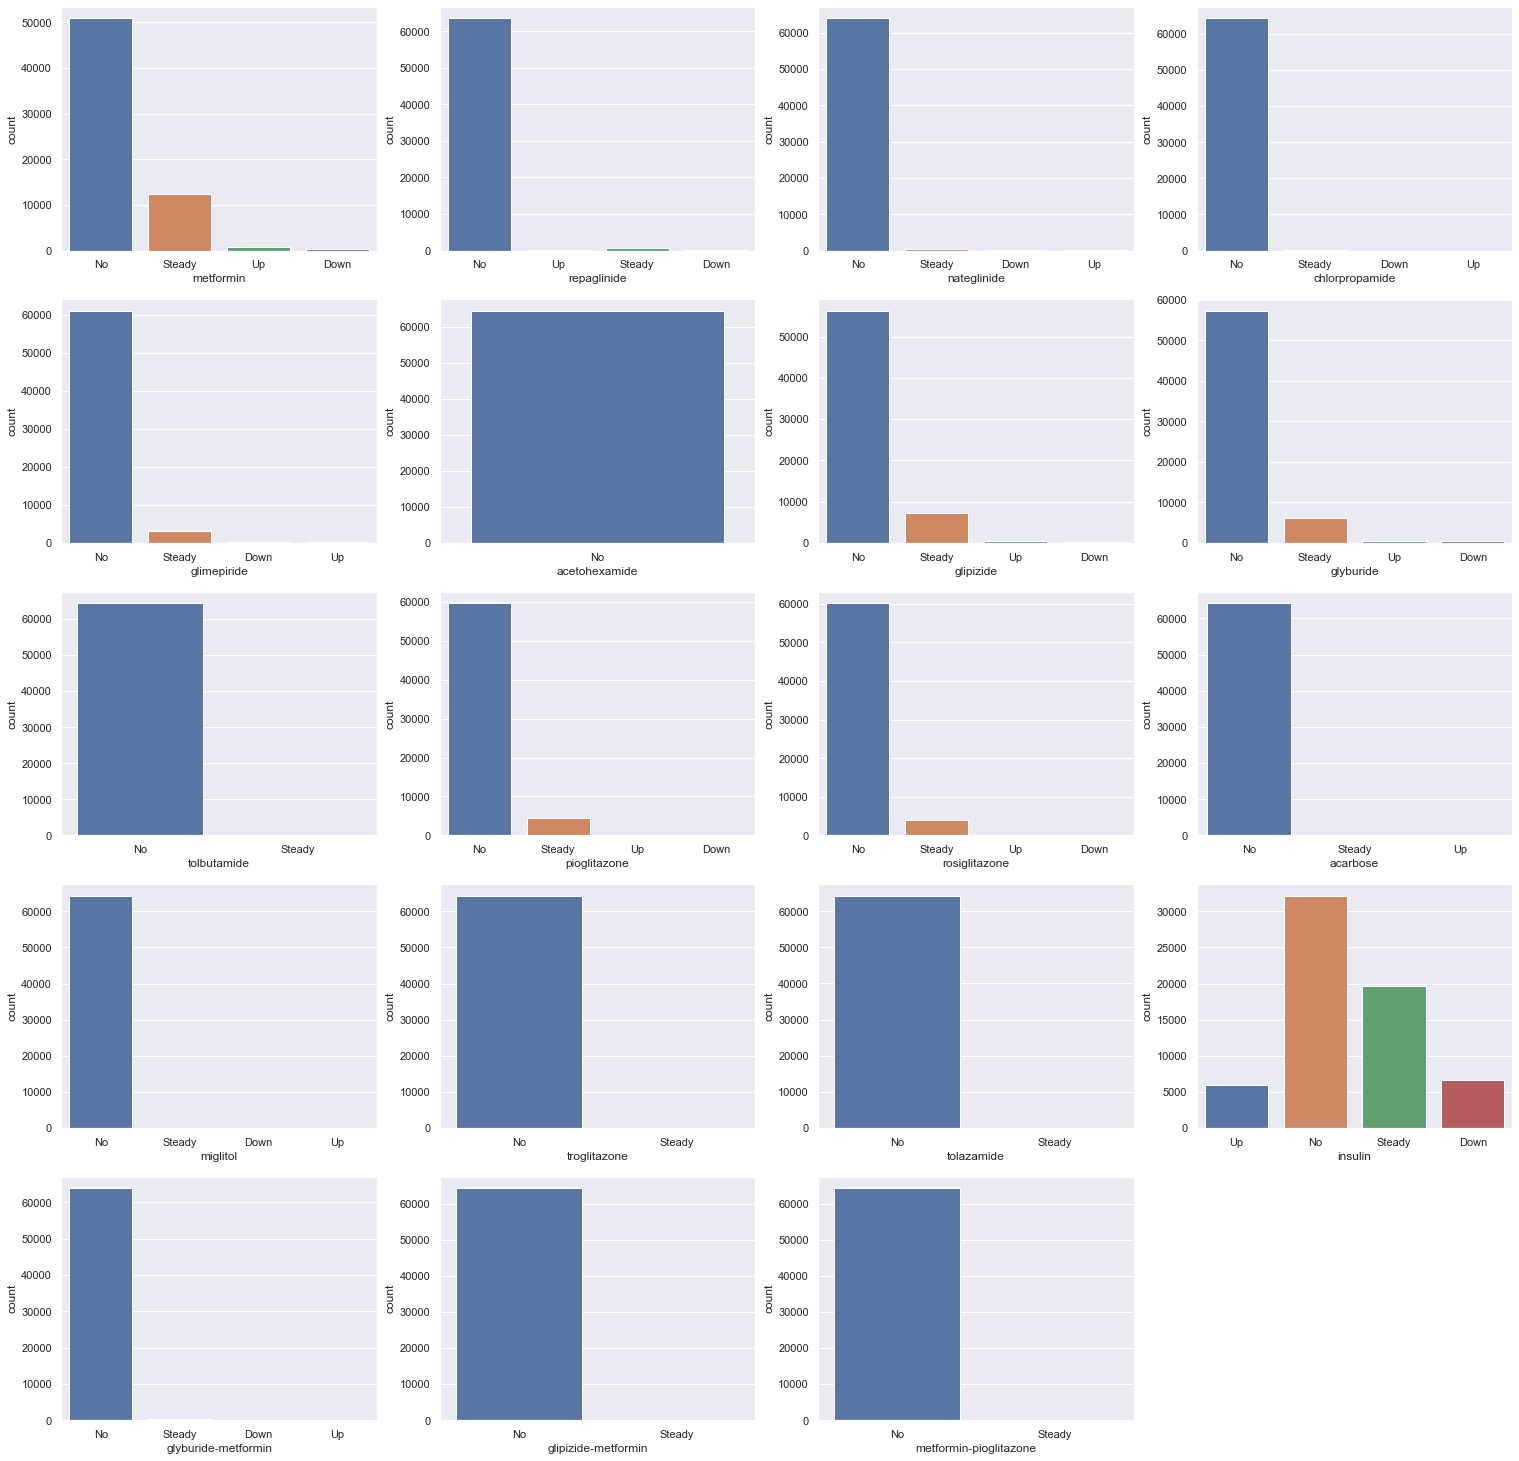

In [77]:
plt.figure(figsize=(26, 26))
plt.subplot(541)
sns.countplot(x='metformin', data=diabetes)
plt.subplot(542)
sns.countplot(x='repaglinide', data=diabetes)
plt.subplot(543)
sns.countplot(x='nateglinide', data=diabetes)
plt.subplot(544)
sns.countplot(x='chlorpropamide', data=diabetes)
plt.subplot(545)
sns.countplot(x='glimepiride', data=diabetes)
plt.subplot(546)
sns.countplot(x='acetohexamide', data=diabetes)
plt.subplot(547)
sns.countplot(x='glipizide', data=diabetes)
plt.subplot(548)
sns.countplot(x='glyburide', data=diabetes)
plt.subplot(549)
sns.countplot(x='tolbutamide', data=diabetes)
plt.subplot(5,4,10)
sns.countplot(x='pioglitazone', data=diabetes)
plt.subplot(5,4,11)
sns.countplot(x='rosiglitazone', data=diabetes)
plt.subplot(5,4,12)
sns.countplot(x='acarbose', data=diabetes)
plt.subplot(5,4,13)
sns.countplot(x='miglitol', data=diabetes)
plt.subplot(5,4,14)
sns.countplot(x='troglitazone', data=diabetes)
plt.subplot(5,4,15)
sns.countplot(x='tolazamide', data=diabetes)
plt.subplot(5,4,16)
sns.countplot(x='insulin', data=diabetes)
plt.subplot(5,4,17)
sns.countplot(x='glyburide-metformin', data=diabetes)
plt.subplot(5,4,18)
sns.countplot(x='glipizide-metformin', data=diabetes)
plt.subplot(5,4,19)
sns.countplot(x='metformin-pioglitazone', data=diabetes)
plt.show()

Dosages for insulin shows the most activity out of all diabetic medications, most of which aren't prescribed to patients.

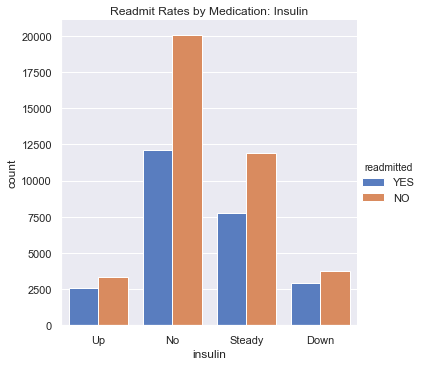

In [78]:
sns.catplot(x='insulin', hue='readmitted', kind='count', palette='muted', data=diabetes)
plt.title('Readmit Rates by Medication: Insulin')
plt.show()

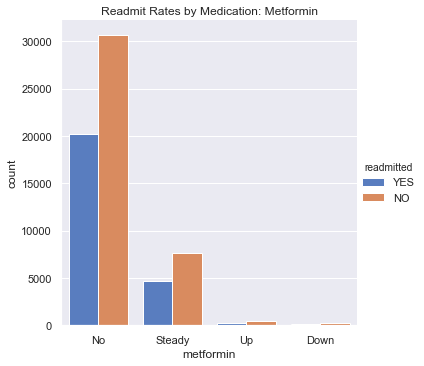

In [79]:
sns.catplot(x='metformin', hue='readmitted', kind='count', palette='muted', data=diabetes)
plt.title('Readmit Rates by Medication: Metformin')
plt.show()

# save cleaned dataset

In [80]:
diabetes = diabetes.reset_index(drop=True)

In [81]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64360 entries, 0 to 64359
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   race                    64360 non-null  object
 1   gender                  64360 non-null  object
 2   age                     64360 non-null  object
 3   time_in_hospital        64360 non-null  int64 
 4   num_lab_procedures      64360 non-null  int64 
 5   num_procedures          64360 non-null  int64 
 6   num_medications         64360 non-null  int64 
 7   num_outpatient          64360 non-null  int64 
 8   num_emergency           64360 non-null  int64 
 9   num_inpatient           64360 non-null  int64 
 10  diag_1                  64360 non-null  object
 11  num_diagnoses           64360 non-null  int64 
 12  max_glu_serum           64360 non-null  object
 13  A1Cresult               64360 non-null  object
 14  metformin               64360 non-null  object
 15  re

In [82]:
# save cleaned dataset to new file
# diabetes.to_csv('diabetes_analysis.csv')